<a href="https://colab.research.google.com/github/dasgupsa/HeartDisease/blob/master/ML_HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine Learning: Heart Disease Prediction

### Introduction
Machine Learning and Deep Learning are computing techniques which are growing steadily and starting to make a meaningful impact on our society today. I have tried to study Machine Learning by myself and implemented a small project to crystallise my knowledge. I have chosen a Kaggle dataset - [Heart Disease](https://www.kaggle.com/c/heart-disease/overview) to practice my knowledge on Machine Learning.






### Problem Statement

The Heart Disease dataset has 13 different characteristics of 303 patients. There is a target column which states whether the patient has heart disease or not. Hence, this is a [binary classification](https://en.wikipedia.org/wiki/Binary_classification) problem. Several different machine learning techniques will be used to find out which algorithm has the best classification performance. A glossary of Key Terms is available at the end of the notebook.



### Roadmap

Every machine learning project has 4 main steps:

- **Data Collection**: obtaining the data.
- **Preprocessing Data**: the dataset needs to be checked for missing values, null/inappropriate values and steps must be taken (if needed) to organise the dataset for inputting into the models. 
- **Model Building & Results**: building and tuning the models to maximise its performance.
- **Further Steps**: Assessing the results from the algorithms and deciding future steps. Are the results satisfactory and conclusive? Do we need to collect more data / tune exisiting models / search / develop other models to get a better result?

### Import Libraries

In [0]:
#Standard Libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

#Machine Learning Libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree
import xgboost as xgb

# Deep Learning Libraries
import keras
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

# Analysing Results
from sklearn.metrics import log_loss, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score

Using TensorFlow backend.


### Data Collection: Load data from Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/My Drive/mydata/heart.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Exploratory Data Analysis

In data science, it is important to analyse the dataset before using the  Machine Learning models. [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html) is an excellent Python library which has several in-built features to help us with data analysis. Some of the key pandas functions are:

- head: a brief overview of the first few rows of the dataframe.
- shape:  provides the number of rows and columns in the dataframe.
- describe: get various summary statistics.
- info: the number and type of value in each column.



In [0]:
# To understand the data better, let’s view the dataset. 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Size of dataset is (303, 14)


Text(0.5, 1.0, 'Target Class')

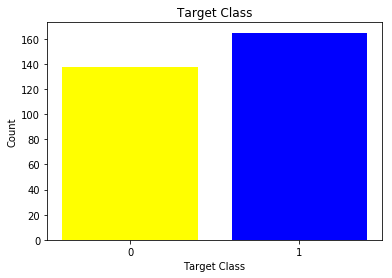

In [0]:
print("Size of dataset is", df.shape)

# Checking the distribution of target classes. 
plt.bar(df['target'].unique(), df['target'].value_counts(), color=['blue', 'yellow'])
plt.xticks([0,1])
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('Target Class')

In [0]:

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [0]:
# The dataset has 303 rows and there are no missing values. 
# There are 13 features and one target column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [0]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

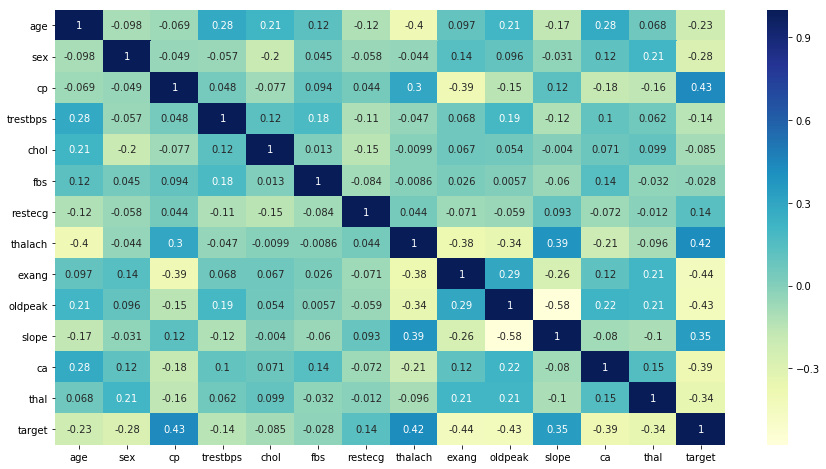

In [0]:
# Correlation heatmap to see the correlation between the different features.
# There are no features which have a very high correlation between them. 
# Hence all features will be used in our modelling.
fig = plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')


### Machine Learning Techniques

- Different supervised machine learning algorithms will be used to see which one provides the best classification. They are:

  - [K Nearest Neighbours (KNN)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
  - [Support Vector Machines (SVM)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
  - [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
  - [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)
  - [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
  - [XGBoost](https://xgboost.readthedocs.io/en/latest/)
  - [Neural Networks](https://keras.io/)

- Python has a very popular package [scikit-learn](https://scikit-learn.org/stable/) which has the above machine learning algorithms already built in. For Neural Networks modelling, the user friendly [ python keras package](https://keras.io/) is used.  To study more about the sci-kit learn library, from a software engineering perspective, please refer to this [paper](https://arxiv.org/abs/1309.0238).
- For each of the models, the following will be done:
 - Instantiating the model.
 - Creating a list of hyperparameter values which need to be tuned.
 - Find the optimal hyperparameters. Then fit and train the model (with the optimal hyperparameters).
 - Test the model on the unseen dataset. The main [classification](https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/) metric to measure the algorithm's performance is [AUC score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). There are several possible metrics to choose from. AUC score was chosen as it is the main classification metric in Kaggle competitions for binary classification problems.
- I have **purposely not explained** the algorithms as there are excellent explanations of these algorithms available online. For the enthusiastic reader, I have provided educational links where the writers have done a fantastic job, explaining the algorithms.

#### Pre-processing data for modelling

In [0]:
ResultsData = [] # empty list to hold results from different algorithms
cv = 10 # number of folds to do in cross validation
X = df.loc[:,df.columns != 'target'] # dataset features 
y = df.loc[:, df.columns == 'target'] # labels

# For Machine learning, we need to split the dataset into two sections - train
# and test. The models are trained on the training set and then we assess
# their accuracy of predicting the right class (heart disease or not) on the test set.

# Splitting dataset into training and test using Python in-built function
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=5)

# The range of the 13 features are quite different. 
# For example, maximum value of the feature 'age' is 77 but for the feature 'cp' it is 3. 
# For distance based algorithms like K-Nearest Neighbours, this disparity in values amongst different 
# features, will have an effect on its performance. 
# An excellent article(http://sebastianraschka.com/Articles/2014_about_feature_scaling.html) 
# explains this topic in depth.


# Hence, the dataset will be standardised in order to minimise any negative effects and 
# maximise the algorithm's performance. We standardise on training set ONLY and apply it to test set
# because we DO NOT want test data information "leaking" into the dataset.

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### [K Nearest Neighbour (KNN)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

- [An article](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761) which explains the inner workings of the algorithm.
- Hyperparameters: 
 - *n_neighbors*:   number of neighbours
 - *p*: distance measure the sci-kit learn default (Euclidean) will be used.





In [0]:
knn = KNeighborsClassifier() # Instantiating the model

#Hyperparameters
param_grid = {"n_neighbors": [5,10,15,20,25]}


#GridSearch CV to find the best hyperparameters
CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv)
CV_knn.fit(X_train, y_train)

#CV_knn.best_params_: This is a dictionary which has the parameters with the best accuracy


# fit the model with training set and predict test set
knn = KNeighborsClassifier(n_neighbors=CV_knn.best_params_['n_neighbors'])
knn.fit(X_train, y_train)
y_log_loss_pred = knn.predict_proba(X_test)
y_pred = knn.predict(X_test)
y_pred_auc = y_log_loss_pred[:, 1] # keep probabilities for one outcome only


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when

In [0]:
#Calculate and print the AUC score
auc = roc_auc_score(y_test, y_pred_auc)

print("AUC-Score is {0:.3f}".format(auc))

#Creating a list of results
li = []
li.append('KNN')
li.append(round (auc,4))

#Appending to main List for Comparison purposes
ResultsData.append(li)

AUC-Score is 0.931


#### [Support Vector Machine (SVM)](https://scikit-learn.org/stable/modules/svm.html)

- [An article](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761) which explains the inner workings of the algorithm.  
  
  
- Hyperparameters: 
  - *C*:  penalty parameter of the error term.
  - *kernel*: the kernel type to be used. The main kernels are radial basis function (rbf) and linear.
  - *gamma*: the kernel coefficient.

In [0]:
svmModel = SVC() # Instantiating the model

#Hyperparameters
parameters = [{'kernel':['rbf'],
              'gamma':[1e-4, 1e-3, 0.01, 0.1, 0.2],
              'C':[1,10,20,30,50,60,100]},
             {'kernel':['linear'], 'C':[1,10,100]}]

#GridSearch CV to find the best hyperparameters
clf = GridSearchCV(svmModel, parameters, cv=cv)
clf.fit(X_train,y_train)

#clf.best_params_: This is a dictionary which has the parameters with the best accuracy

svc = SVC(C= clf.best_params_['C'], 
          kernel= clf.best_params_['kernel'],
          gamma = clf.best_params_['gamma'],
          probability=True)

# fit the model with training set and predict test set
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
y_log_loss_pred = svc.predict_proba(X_test)
y_pred_auc = y_log_loss_pred[:, 1] # keep probabilities for one outcome only


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [0]:
#Calculate and print the AUC score
auc = roc_auc_score(y_test, y_pred_auc)
print("AUC-Score is {0:.3f}".format(auc))

#Creating a list of results
li = []
li.append('SVM')
li.append(round (auc,4))

#Appending to main List for Comparison purposes
ResultsData.append(li)

AUC-Score is 0.949


#### [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

- [An article](https://www.geeksforgeeks.org/understanding-logistic-regression/) which explains the inner workings of the algorithm.
 
- Hyperparameters:  
 - *Penalty*: specifies the norm used in the penalization - l1 or l2.
 - *C*: Inverse of regularization strength. Lower the value, higher the regularisation strength.

In [0]:
logRegModel = LogisticRegression() # Instantiating the model

#Hyperparameters
penalty = ['l1', 'l2']
C = np.linspace(1, 20, 3)
hyperparameters = dict(C=C, penalty=penalty)

#GridSearch CV to find the best hyperparameters
logreg_cv = GridSearchCV(logRegModel, hyperparameters, cv=cv)
logreg_cv.fit(X_train,y_train)

# logreg_cv.best_params_ - dictionary which contains the hyperparameters with the best results

lr = LogisticRegression(C = logreg_cv.best_params_['C'], penalty=logreg_cv.best_params_['penalty'])

# fit the model with training set
lr.fit(X_train, y_train)
y_log_loss_pred = lr.predict_proba(X_test)
y_pred = lr.predict(X_test)
y_pred_auc = y_log_loss_pred[:, 1] # keep probabilities for one outcome only

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:43

In [0]:
#Calculate and print the AUC score
auc = roc_auc_score(y_test, y_pred_auc)

print("AUC-Score is {0:.3f}".format(auc))

#Creating a list of results
li = []
li.append('Logistic Regression')
li.append(round (auc,4))

#Appending to main List for Comparison purposes
ResultsData.append(li)

AUC-Score is 0.942


#### [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)

 - [An article](https://towardsdatascience.com/unfolding-na%C3%AFve-bayes-from-scratch-2e86dcae4b01) which explains the inner workings of the algorithm.
 
 
- Hyperparameters: 
 - No hyperparameters.


In [0]:
nb = GaussianNB() # Instantiating the model

# fit the model with training set
nb.fit(X_train, y_train)
y_log_loss_pred = lr.predict_proba(X_test)
y_pred = lr.predict(X_test)
y_pred_auc = y_log_loss_pred[:, 1]  # keep probabilities for one outcome only

#Calculate and print the AUC score
auc = roc_auc_score(y_test, y_pred_auc)

print("AUC-Score is {0:.3f}".format(auc))

#Creating a list of results
li = []
li.append('Naive Bayes')
li.append(round (auc,4))

#Appending to main List for Comparison purposes
ResultsData.append(li)

AUC-Score is 0.942


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

- [An article](https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/) which explains the inner workings of the algorithm.

- Hyperparameters: 
  -  N_estimators: number of trees you want to build.
  - Max_depth:  max number of levels in each decision tree.
  - Min_samples_split: min number of data points placed in a node before the node is split. 
  - Min_samples_leaf: min number of data points allowed in a leaf node.
  
  


In [0]:
rfc = RandomForestClassifier() # Instantiating the model
 
# Hyperparameters
param_grid = {"n_estimators": [10, 18, 22,30, 40, 50, 60, 70],
              "max_depth": [3, 5],
              "min_samples_split": [15, 20],
              "min_samples_leaf": [5, 10, 20]}

#GridSearch CV to find the best hyperparameters
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= cv)
CV_rfc.fit(X_train,y_train)

# This is a dictionary with the hyperparameters which produced the best result.
CV_rfc.best_params_

rfc = RandomForestClassifier(n_estimators= CV_rfc.best_params_['n_estimators'], 
                             max_depth= CV_rfc.best_params_['max_depth'],
                             min_samples_leaf = CV_rfc.best_params_['min_samples_leaf'],
                             min_samples_split= CV_rfc.best_params_['min_samples_split'])


# fit the model with training set
rfc.fit(X_train, y_train)
y_log_loss_pred = rfc.predict_proba(X_test)
y_pred = rfc.predict(X_test)
y_pred_auc = y_log_loss_pred[:, 1]



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 

In [0]:
#Calculate and print the AUC score
auc = roc_auc_score(y_test, y_pred_auc)
print("AUC-Score is {0:.3f}".format(auc))

#Creating a list of results
li = []
li.append('Random Forest')
li.append(round (auc,4))

#Appending to main List for Comparison purposes
ResultsData.append(li)

AUC-Score is 0.960


#### [XGBoost (Extreme Gradient Boosting)](https://xgboost.readthedocs.io/en/latest/)

 - [An article](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/) which explains the inner workings of the algorithm.
 
- Hyperparameters: 

 - learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1] 
  - n_estimators: number of trees to build.
 - max_depth: tree depth allowed during any boosting round.
 - min_child_weight: minimum sum of instance weight (hessian) needed in a child.
  - subsample: percentage of samples used per tree. 
  - colsample_bytree: percentage of features used per tree. 

 - gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.





In [0]:
from xgboost import XGBClassifier # Instantiating the model
model = XGBClassifier()

#Hyperparameter tuning in XGBoost is very painful.
# We have to break it up in parts and tweak a set at a time.
 
#Our initial set of hyperparameters which will be updated with the best parameters
ind_params = {'n_estimators': 1000, 'seed':0, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth': 3, 'min_child_weight': 1}

# Hyperparameters
n_estimators = [100, 200, 300]
learning_rate = [0.1, 0.2, 0.3]

#param_grid = dict(n_estimators=n_estimators, learning_rate=learning_rate,  subsample = subsample,
#                 eta = eta, max_depth=max_depth, min_child_weight = min_child_weight , gamma = gamma, colsample_bytree=colsample_bytree)

param_grid = dict(n_estimators=n_estimators, learning_rate=learning_rate)

#GridSearch CV to find the best hyperparameters
CV_XGB = GridSearchCV(XGBClassifier(**ind_params), param_grid=param_grid, cv= cv)
CV_XGB.fit(X_train,y_train)

# This is a dictionary with the hyperparameters which produced the best result.
CV_XGB.best_params_


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.2, 'n_estimators': 100}

In [0]:
# List below is updated with the best params obtained from the previous GridSearch
ind_params = {'learning_rate':0.2, 'n_estimators': 100, 'eta': 0.1, 'colsample_bytree': 0.8, 
              'subsample' : 0.7, 'max_depth': 3, 'min_child_weight': 1}

subsample = [0.7,0.8,0.9]
eta = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30]

param_grid = dict(subsample=subsample, eta=eta)

#GridSearch CV to find the best hyperparameters
CV_XGB = GridSearchCV(XGBClassifier(**ind_params), param_grid=param_grid, cv= cv)
CV_XGB.fit(X_train,y_train)

# This is a dictionary with the hyperparameters which produced the best result.
CV_XGB.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'eta': 0.05, 'subsample': 0.9}

In [0]:
# List below is updated with the best params obtained from the previous GridSearch
ind_params = {'learning_rate':0.1, 'n_estimators': 100, 'eta':0.05, 'subsample':0.9,
              'seed':0, 'colsample_bytree': 0.8, 'objective': 'binary:logistic', 'max_depth': 3, 'min_child_weight': 1}

max_depth = [ 3, 4, 5, 6, 8, 10, 12, 15]
min_child_weight = [ 1, 3, 5, 7]

param_grid = dict(max_depth=max_depth, min_child_weight=min_child_weight)

#GridSearch CV to find the best hyperparameters
CV_XGB = GridSearchCV(XGBClassifier(**ind_params), param_grid=param_grid, cv= cv)
CV_XGB.fit(X_train,y_train)

# This is a dictionary with the hyperparameters which produced the best result.
CV_XGB.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 4, 'min_child_weight': 5}

In [0]:
# List below is updated with the best params obtained from the previous GridSearch
ind_params = {'learning_rate':0.1, 'n_estimators': 100, 'eta':0.05, 'subsample':0.7,
              'colsample_bytree': 0.8, 'max_depth': 4, 'min_child_weight': 5}

gamma = [ 0.0, 0.1, 0.2 , 0.3, 0.4]
colsample_bytree = [ 0.3, 0.4, 0.5,0.7]

param_grid = dict(gamma=gamma, colsample_bytree=colsample_bytree)

#GridSearch CV to find the best hyperparameters
CV_XGB = GridSearchCV(XGBClassifier(**ind_params), param_grid=param_grid, cv= cv)
CV_XGB.fit(X_train,y_train)

# This is a dictionary with the hyperparameters which produced the best result.
CV_XGB.best_params_



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'colsample_bytree': 0.7, 'gamma': 0.3}

In [0]:
# Now we have our FINAL list of numbers. 

ind_params = {'learning_rate':0.1, 'n_estimators': 100, 'eta':0.05, 'subsample':0.7,
              'gamma':0.3, 'colsample_bytree': 0.4, 'objective': 'binary:logistic', 'max_depth': 3, 'min_child_weight': 7}



In [0]:
# fit the model with training set
xgbModel = XGBClassifier(learning_rate= 0.1, n_estimators= 100,eta = 0.05, subsample = 0.7,gamma = 0.3, 
                             colsample_bytree = 0.4, max_depth= 3, min_child_weight = 7, n_jobs=-1)

xgbModel.fit(X_train, y_train)
y_log_loss_pred = xgbModel.predict_proba(X_test)
y_pred = xgbModel.predict(X_test)
y_pred_auc = y_log_loss_pred[:, 1] # keep probabilities for one outcome only

#Calculate and print the AUC score
auc = roc_auc_score(y_test, y_pred_auc)
print("AUC-Score is {0:.3f}".format(auc))

#Creating a list of results
li = []
li.append('XGBoost')
li.append(round (auc,4))

#Appending to main List for Comparison purposes
ResultsData.append(li)



AUC-Score is 0.954


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### [Neural Networks](http://neuralnetworksanddeeplearning.com/)

 - [An excellent free book](http://neuralnetworksanddeeplearning.com/) is available online for a deep and thorough understanding of neural networks. 
 

- Hyperparameters: 
 - number of hidden layers, neurons in each hidden layer.
 - dropout, activation function, batch size, epochs.
 - loss function, optimiser.
 - An extensive [article](https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/) which covers all the hyperparameters.

In [0]:
# Many different hyperparameters were tried and the settings below
# provided the best classification accuracy.

batch_size = 20
epochs = 20 # An epoch is an iteration over the entire data set.

# Small Neural Network
classifier = Sequential()
classifier.add(Dense(output_dim = 12, init='uniform', activation='relu', input_shape=(13,)))
# Adding the second hidden layer
classifier.add(Dropout(0.4))
classifier.add(Dense(output_dim=24, init = 'uniform', activation="relu", ))

# Adding the third hidden layer with dropout

classifier.add(Dense(output_dim=36, init = 'uniform', activation="relu", ))
# Adding the output layer - this is a binary classification, hence we use sigmoid, else - softmax
classifier.add(Dense(1, activation='sigmoid')) 

# Informs us of the model architecture and how many weights need to be trained
classifier.summary()


W0808 19:26:28.442094 140053252409216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_shape=(13,), units=12, kernel_initializer="uniform")`
  import sys
W0808 19:26:28.460818 140053252409216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0808 19:26:28.463535 140053252409216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0808 19:26:28.480000 140053252409216 deprecation_wrapper.py:11

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                168       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_3 (Dense)              (None, 36)                900       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 37        
Total params: 1,417
Trainable params: 1,417
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=24, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=36, kernel_initializer="uniform")`
  


In [0]:
# Compiling and Fitting the Model

#Compile Method. There are 3 inputs
# 1. Optimiser: There are several options, but the recommended one is Adam (Adaptive moment estimation)
# Adam is a combination of RMSProp + Momentum.
# 2. Loss Function: This is a binary classification problem. Hence, binary_crossentropy is used 
# to calculate the loss function between the actual output and the predicted output.
# 3. Metrics: Accuracy is the metric used to measure model performance

adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
classifier.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fitting our model
classifier_train = classifier.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0)

# We calculate the loss & accuracy value for the model in test mode using the evaluate function
test_eval = classifier.evaluate(X_test, y_test, verbose=0)
print('Test Log loss:', test_eval[0])
print('Test accuracy:', test_eval[1])
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


# predict probabilities for test set
yhat_probs = classifier.predict(X_test, verbose=0)
yhat_probs = yhat_probs[:, 0]


#Calculate and print the AUC score
auc = roc_auc_score(y_test, yhat_probs)

print("AUC-Score is {0:.3f}".format(auc))

#Creating a list of results
li = []
li.append('Neural Networks')
li.append(round (auc,4))

#Appending to main List for Comparison purposes
ResultsData.append(li)

W0808 19:26:28.580893 140053252409216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0808 19:26:28.587377 140053252409216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0808 19:26:28.593000 140053252409216 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Test Log loss: 0.29195209553367213
Test accuracy: 0.9210526347160339
AUC-Score is 0.941


### Comparison

The table below shows the performance of all the different classifiers.

In [0]:
#https://datascience.stackexchange.com/questions/26333/convert-a-list-of-lists-into-a-pandas-dataframe
df_data = pd.DataFrame(ResultsData)
df_data.columns = ["Algorithm", "AUC Score"]
df_data

,Algorithm,AUC Score
0,KNN,0.9307
1,SVM,0.9494
2,Logistic Regression,0.9418
3,Naive Bayes,0.9418
4,Random Forest,0.9598
5,XGBoost,0.9536
6,Neural Networks,0.9411


### Conclusion
- Using AUC Score, Random Forest provides the best classification accuracy.
- XGBoost which is known for providing very good perfomance was fractionally lower than Random Forest.


### Further Work

- Feature engineering could be investigated (e.g. PCA to remove redundant features) to try and obtain better accuracy.
- A very popular technique for increasing accuracy especially in Kaggle competitions is ensembling. A good link is [here](https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python).
- In order to further strengthen our conclusions, we should obtain more data to further test our algorithms and see if the same conclusion holds..

### References

This is a list of good websites (not already mentioned above), which I have found very useful:

- [A pipeline for solving machine learning problems](http://blog.kaggle.com/2016/07/21/approaching-almost-any-machine-learning-problem-abhishek-thakur/)
- [Math behind the XGBoost Algorithm](https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/)




### Key Terms

There are some terms, which are very common in Machine Learning literature and a brief explanation is provided:

- [Supervised Learning](https://en.wikipedia.org/wiki/Supervised_learning): There are input variables (x) and an output variable (y). We need to find an algorithm to learn the mapping function from the input to the output.
- [Unsupervised Learning](https://en.wikipedia.org/wiki/Unsupervised_learning): There is only input data (x) and no corresponding output variable (y). The aim is to model the underlying structure or distribution in the data in order to learn more about the data.
- [Cross Validation](https://scikit-learn.org/stable/modules/cross_validation.html): It's a technique where the data is split into several parts. We tune our model on some parts of the data. We test the model's performance on the data which was kept aside. For a detailed explanation, please refer to this [link](https://docs.aws.amazon.com/machine-learning/latest/dg/cross-validation.html)
- [Log Loss (logistic loss/cross-entropy loss)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html) - A performance metric used to evaluate the probability outputs of a classifier as opposed to its predictions.
- [Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) - A performance measure which determines the percentage of samples the algorithm was able to classify correctly.
- [Perfomance Measures (precision, recall, f1-score) ](https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/) - Some other measures which help us determine the quality of the algorithm's perfomance.
- [ROC Curves for Binary Classification](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/) - Receiver Operating Characteristic (ROC) curves are an important classification metric, especially for binary classification. For deep learning models, please check this [link](https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/).
